<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#AB-Testing" data-toc-modified-id="AB-Testing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>AB-Testing</a></span></li></ul></div>

# AB-Testing

![cats](images/cats.jpeg)


Imaginad que somos los cientificos de datos de la empresa de videojuegos Tactile Entertainment. Los desarrolladores del juego Cookie Cats pretenden introducir un cambio en el juego para aumentar la retencion de los jugadores. En cierto nivel del juego los jugadores se encuentran una puerta que les obliga a esperar o a pagar la app. Actualmente la puerta se encuentra en nivel 30 y se pretende pasar al nivel 40, para comprobar la retencion a 1 y 7 dias. Antes de realizar el cambio definitivo en el juego se raliza un test AB.

Los datos estan alojados en `data/cookie_cats.csv`. Nuestro grupo de control sera la version actual `gate_30` y el grupo de tratamiento sera la version `gate_40`. Debemos realizar el test para 1 dia de retencion `retention_1` y para 7 dias `retention_7`.

In [30]:
# librerias

import pandas as pd
import numpy as np
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from scipy.stats import norm, sem
from scipy.stats import bernoulli, beta   
import pylab as plt
from bayes import *

In [97]:
# datos

data=pd.read_csv('data/cookie_cats.csv')
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [ ]:
control_group= data[data['version']=='gate_30']
treat_group= data[data['version']=='gate_40']

# filtrando cada grupo para cada test 

control_group_ret_1= control_group['retention_1']
control_group_ret_7= control_group['retention_7']
treat_group_ret_1 = treat_group['retention_1']
treat_group_ret_7 = treat_group['retention_7']

In [96]:
control_group_ret_1.value_counts(), treat_group_ret_1.value_counts()


(False    24666
 True     20034
 Name: retention_1, dtype: int64,
 False    25370
 True     20119
 Name: retention_1, dtype: int64)

In [113]:
#empiezo con el test de la retention 1: 

α_control_1, β_control_1 = control_group_ret_1.value_counts()[-1], control_group_ret_1.value_counts()[0]

α_treat_1, β_treat_1 = treat_group_ret_1.value_counts()[-1], treat_group_ret_1.value_counts()[0]


beta_control_1 = beta(α_control_1, β_control_1)

beta_treat_1 = beta(α_treat_1, β_treat_1)

In [121]:
def plot(betas, names, linf=0.43, lsup=0.46):
    x=np.linspace(linf, lsup, 100)
    for f, n in zip(betas, names):
        y=f.pdf(x)
        y_pico=pico(f.args[0], f.args[1])
        y_var=f.var()
        plt.plot(x, y, label='{}, retention: {:.6f} $\pm$ {:.10f}'.format(n, y_pico, y_var))
        plt.yticks([])
    plt.legend()
    plt.show();


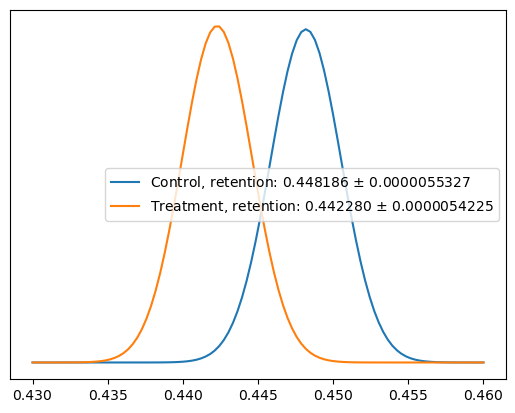

In [122]:
plot([beta_control_1, beta_treat_1], ['Control', 'Treatment'])

In [125]:
# la probabilidad de retention 1 si cambiamos a gate_40

1 - calc_prob(beta_control_1, beta_treat_1)


0.037203776277147216

# Ahora para retention_7

In [117]:
# testeo para retention_7

control_group_ret_7.value_counts(), treat_group_ret_7.value_counts()

α_control_7, β_control_7 = control_group_ret_7.value_counts()[-1], control_group_ret_7.value_counts()[0]

α_treat_7, β_treat_7 = treat_group_ret_7.value_counts()[-1], treat_group_ret_7.value_counts()[0]


beta_control_7 = beta(α_control_7, β_control_7)

beta_treat_7 = beta(α_treat_7, β_treat_7)

In [118]:
def plot_2(betas, names, linf=0.17, lsup=0.20):
    x=np.linspace(linf, lsup, 100)
    for f, n in zip(betas, names):
        y=f.pdf(x)
        y_pico=pico(f.args[0], f.args[1])
        y_var=f.var()
        plt.plot(x, y, label='{}, retention: {:.6f} $\pm$ {:.10f}'.format(n, y_pico, y_var))
        plt.yticks([])
    plt.legend()
    plt.show();

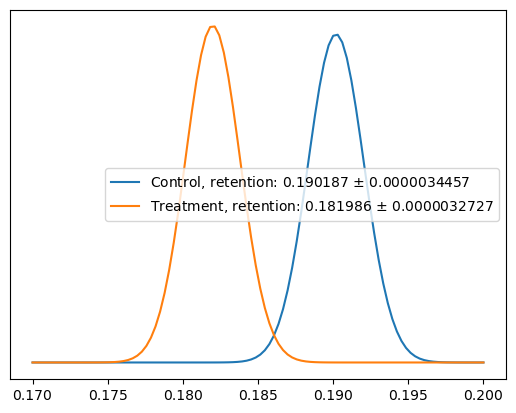

In [119]:
plot_2([beta_control_7, beta_treat_7], ['Control', 'Treatment'])

In [120]:
# la probabilidad de retention 7 si cambiamos a gate_40

1- calc_prob(beta_control, beta_treat)

0.0007771582944278155

# conclusiones
Si cambiamos a gate_40 tenemos un 0.037 de probabilidad de retention 1 y un 0.0007 de probabilidad de retention 7. Las retenciones son mejores si nos quedamos con gate_30.